In [16]:
from skimage.feature import graycomatrix, graycoprops
from skimage import io
import numpy as np
import cv2
import os
import PIL
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
# URL Dataset
# Minarno, Agus Eko; Soesanti, Indah; Nugroho, Hanung Adi (2024), “Batik Nitik Sarimbit 120”, Mendeley Data, V1, doi: 10.17632/cx5sr2dgrr.1


In [12]:
folder_path = 'aug_dataset_7_kelas'

nama_image = []
nama_label = []

for root, dirs, files in os.walk(folder_path):
  for dir in dirs:
    nama_label.append(dir)
  for file_name in files:
    nama_image.append(file_name)
    

print(nama_image)

['Gedhangan_original_42 Gedhangan A.jpg_0e7a98b8-2f48-49dd-aec6-c0b3a59dce2c.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_16859f5c-4c58-4b95-a45f-6808d3dfa6f6.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_e8f9dfe0-538a-434a-931d-82b1e01e8b74.jpg', 'Gedhangan_original_42 Gedhangan A.jpg_da512a28-c8f8-4916-bea3-8125e61684aa.jpg', 'Gedhangan_original_42 Gedhangan A.jpg_790746c4-b60c-426e-848a-a7edcc495a96.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_0c854186-092a-4657-8f5b-817daa5f6830.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_cd5e3b4b-4e46-437a-a267-3dfed8d11f10.jpg', 'Gedhangan_original_42 Gedhangan A.jpg_39f57166-2f2a-4e24-9a02-42d92d94952e.jpg', 'Gedhangan_original_42 Gedhangan A.jpg_085687d1-509e-42e4-b066-d59d82278079.jpg', 'Gedhangan_original_42 Gedhangan A.jpg_e63356ad-8d64-429e-aa69-14493c0bfaf4.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_26c0e7fb-dc46-4351-8f28-1f7b51044d04.jpg', 'Gedhangan_original_42 Gedhangan B.jpg_57d2ca45-746c-4e12-8d04-48d19351a8c8.jpg', 'Gedhangan_orig

In [18]:
# Inisialisasi list untuk menyimpan nama_label yang sudah diekstrak
extracted_labels = []

# Loop melalui setiap data dalam list_data
for data in nama_image:
    # Loop melalui setiap nilai nama_label
    for label in nama_label:
        # Periksa apakah label ada dalam data
        if label in data:
            extracted_labels.append(label)
            break  # Keluar dari loop jika label sudah ditemukan pada data

# Menghitung jumlah label yang diekstrak
label_counter = Counter(extracted_labels)

# Menambahkan counter untuk data yang tidak memiliki nama_label yang diekstrak
unextracted_data_counter = Counter()

for data in nama_image:
    extracted = False
    for label in nama_label:
        if label in data:
            extracted = True
            break
    if not extracted:
        unextracted_data_counter.update([data])

# Print hasil ekstraksi
print("Nama Label yang diekstrak:", extracted_labels)
print("Counter label:", label_counter)
print("Data yang tidak diekstrak nama labelnya:", dict(unextracted_data_counter))

Nama Label yang diekstrak: ['Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan', 'Gedhangan

In [28]:
labels = np.unique(extracted_labels)
ints = np.arange(0, len(extracted_labels))
dicts = dict(zip(labels, ints))
dicts

{'Gedhangan': 0,
 'Kawung Nitik': 1,
 'Sekar Cengkeh': 2,
 'Sekar Kemuning': 3,
 'Sekar Liring': 4,
 'Sekar Menur': 5,
 'Sekar Randhu': 6}

In [20]:
df = pd.DataFrame({'nama_label':extracted_labels, 'nama_file':nama_image})
df.head(10)

,nama_label,nama_file
0,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_0e7a98b8...
1,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_16859f5c...
2,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_e8f9dfe0...
3,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_da512a28...
4,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_790746c4...
5,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_0c854186...
6,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_cd5e3b4b...
7,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_39f57166...
8,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_085687d1...
9,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_e63356ad...


In [23]:
index = []
for i in range(len(df)):
    try:
      path_baru = folder_path + "/" + str(df['nama_label'].values[i]) + "/" + str(df['nama_file'].values[i])
      # print(path_baru)
      image = Image.open(path_baru)
    
    except PIL.UnidentifiedImageError:
      index.append(i)

df = df.drop(index)
df.head(10)

,nama_label,nama_file
0,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_0e7a98b8...
1,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_16859f5c...
2,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_e8f9dfe0...
3,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_da512a28...
4,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_790746c4...
5,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_0c854186...
6,Gedhangan,Gedhangan_original_42 Gedhangan B.jpg_cd5e3b4b...
7,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_39f57166...
8,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_085687d1...
9,Gedhangan,Gedhangan_original_42 Gedhangan A.jpg_e63356ad...


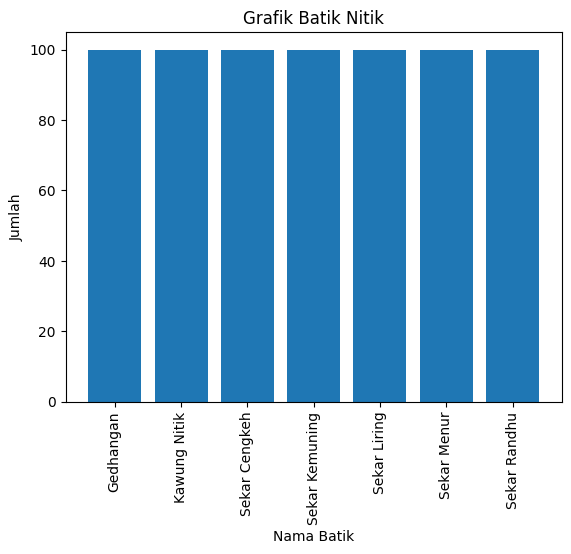

In [29]:
target, count = np.unique(df['nama_label'], return_counts=True)
plt.bar(target, count)
plt.title('Grafik Batik Nitik')
plt.xlabel('Nama Batik')
plt.ylabel('Jumlah')
plt.xticks(rotation='vertical')
plt.show()

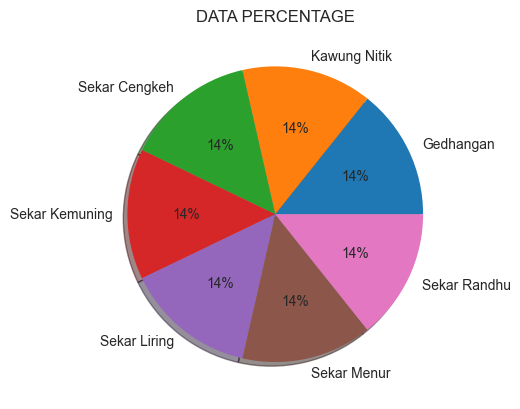

In [30]:
precentange = [x / np.sum(count) for x in count]
plt.style.use('seaborn-v0_8-white')
plt.pie(precentange, labels = target,  autopct='%1.f%%', shadow=True)
plt.title('DATA PERCENTAGE')
plt.show()

In [32]:
img_pre = []
new_size = (128,128)

for i in range(len(df)):
  path_baru = folder_path + "/" + str(df['nama_label'].values[i]) + "/" + str(df['nama_file'].values[i])
  # print(path_baru)
  image = Image.open(path_baru)
  grayscale_image = image.convert('L')
  resize_image = grayscale_image.resize(new_size)
  img_pre.append(resize_image)

img_pre_array = np.array(img_pre)

In [33]:
derajat0_contrast = []
derajat0_homogeneity = []
derajat0_correlation = []
derajat0_asm = []

for i in range(len(img_pre_array)):
  hasil_tampung = []
  glcm = graycomatrix(img_pre_array[i], distances=[1], angles=[0], levels=256)
  derajat0_contrast.append(graycoprops(glcm, 'contrast')[0, 0])
  derajat0_homogeneity.append(graycoprops(glcm, 'homogeneity')[0, 0]) 
  derajat0_correlation.append(graycoprops(glcm, 'correlation')[0, 0])
  derajat0_asm.append(graycoprops(glcm, 'ASM')[0, 0])

In [34]:
derajat45_contrast = []
derajat45_homogeneity = []
derajat45_correlation = []
derajat45_asm = []

for i in range(len(img_pre_array)):
  hasil_tampung = []
  glcm = graycomatrix(img_pre_array[i], distances=[1], angles=[np.pi/4], levels=256)
  derajat45_contrast.append(graycoprops(glcm, 'contrast')[0, 0])
  derajat45_homogeneity.append(graycoprops(glcm, 'homogeneity')[0, 0]) 
  derajat45_correlation.append(graycoprops(glcm, 'correlation')[0, 0])
  derajat45_asm.append(graycoprops(glcm, 'ASM')[0, 0])


In [35]:
derajat90_contrast = []
derajat90_homogeneity = []
derajat90_correlation = []
derajat90_asm = []

for i in range(len(img_pre_array)):
  hasil_tampung = []
  glcm = graycomatrix(img_pre_array[i], distances=[1], angles=[np.pi/2], levels=256)
  derajat90_contrast.append(graycoprops(glcm, 'contrast')[0, 0])
  derajat90_homogeneity.append(graycoprops(glcm, 'homogeneity')[0, 0]) 
  derajat90_correlation.append(graycoprops(glcm, 'correlation')[0, 0])
  derajat90_asm.append(graycoprops(glcm, 'ASM')[0, 0])


In [36]:
derajat135_contrast = []
derajat135_homogeneity = []
derajat135_correlation = []
derajat135_asm = []

for i in range(len(img_pre_array)):
  hasil_tampung = []
  glcm = graycomatrix(img_pre_array[i], distances=[1], angles=[3*np.pi/4], levels=256)
  derajat135_contrast.append(graycoprops(glcm, 'contrast')[0, 0])
  derajat135_homogeneity.append(graycoprops(glcm, 'homogeneity')[0, 0]) 
  derajat135_correlation.append(graycoprops(glcm, 'correlation')[0, 0])
  derajat135_asm.append(graycoprops(glcm, 'ASM')[0, 0])


In [38]:
df_calc = pd.DataFrame(dict(
  image_name=df['nama_file'], 
  nama_label=df['nama_label'],
  derajat0_contrast = derajat0_contrast,
  derajat0_homogeneity = derajat0_homogeneity,
  derajat0_correlation = derajat0_correlation,
  derajat0_asm = derajat0_asm,
  derajat45_contrast = derajat45_contrast,
  derajat45_homogeneity = derajat45_homogeneity,
  derajat45_correlation = derajat45_correlation,
  derajat45_asm = derajat45_asm,
  derajat90_contrast = derajat90_contrast,
  derajat90_homogeneity = derajat90_homogeneity,
  derajat90_correlation = derajat90_correlation,
  derajat90_asm = derajat90_asm,
  derajat135_contrast = derajat135_contrast,
  derajat135_homogeneity = derajat135_homogeneity,
  derajat135_correlation = derajat135_correlation,
  derajat135_asm = derajat135_asm
  )
)

df_calc.head(10)

,image_name,nama_label,derajat0_contrast,derajat0_homogeneity,derajat0_correlation,derajat0_asm,derajat45_contrast,derajat45_homogeneity,derajat45_correlation,derajat45_asm,derajat90_contrast,derajat90_homogeneity,derajat90_correlation,derajat90_asm,derajat135_contrast,derajat135_homogeneity,derajat135_correlation,derajat135_asm
0,Gedhangan_original_42 Gedhangan A.jpg_0e7a98b8...,Gedhangan,777.677473,0.264051,0.797733,0.005243,1327.537851,0.207405,0.650129,0.004267,831.668738,0.248797,0.783521,0.005020,1413.652985,0.206492,0.627430,0.004275
1,Gedhangan_original_42 Gedhangan B.jpg_16859f5c...,Gedhangan,876.271038,0.252975,0.796409,0.004676,1587.603571,0.195664,0.626237,0.003797,931.785741,0.235288,0.783308,0.004488,1491.479261,0.197360,0.648870,0.003809
2,Gedhangan_original_42 Gedhangan B.jpg_e8f9dfe0...,Gedhangan,242.749200,0.370057,0.796444,0.015255,413.615227,0.298599,0.648590,0.012616,258.965551,0.354473,0.782681,0.014719,440.463017,0.294350,0.625776,0.012566
3,Gedhangan_original_42 Gedhangan A.jpg_da512a28...,Gedhangan,549.690453,0.295731,0.796868,0.007310,937.064976,0.232156,0.649116,0.005954,586.027375,0.277526,0.783246,0.006953,996.870978,0.229154,0.626718,0.005966
4,Gedhangan_original_42 Gedhangan A.jpg_790746c4...,Gedhangan,251.861774,0.362928,0.796300,0.014317,456.667865,0.290149,0.625790,0.011839,268.578187,0.347288,0.782601,0.013848,429.407341,0.294390,0.648130,0.011891
5,Gedhangan_original_42 Gedhangan B.jpg_0c854186...,Gedhangan,543.974594,0.292341,0.796912,0.007254,925.818712,0.234483,0.649767,0.006023,578.878199,0.281064,0.783709,0.007072,986.329965,0.231652,0.626873,0.006012
6,Gedhangan_original_42 Gedhangan B.jpg_cd5e3b4b...,Gedhangan,339.377891,0.332416,0.789796,0.011194,579.032054,0.272917,0.639273,0.009384,352.990157,0.328010,0.782937,0.011025,601.138570,0.269772,0.625488,0.009389
7,Gedhangan_original_42 Gedhangan A.jpg_39f57166...,Gedhangan,1969.388041,0.187252,0.786713,0.002312,3241.356811,0.150675,0.648622,0.001926,1857.098733,0.182924,0.801306,0.002246,3269.842396,0.148669,0.645543,0.001897
8,Gedhangan_original_42 Gedhangan A.jpg_085687d1...,Gedhangan,1829.895054,0.193563,0.806779,0.002284,3402.204290,0.147893,0.635832,0.001864,2085.389948,0.178269,0.777078,0.002193,3262.602951,0.147621,0.650774,0.001858
9,Gedhangan_original_42 Gedhangan A.jpg_e63356ad...,Gedhangan,1358.954663,0.213124,0.822682,0.002807,2678.694401,0.160183,0.646008,0.002240,1711.404035,0.190172,0.774090,0.002649,2568.764710,0.166200,0.660537,0.002315


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Misal df_full adalah DataFrame yang telah Anda sediakan

# Pisahkan fitur dan label
# ubah fitur sesuai dengan derajat 
X = df_calc[['derajat0_contrast', 'derajat0_homogeneity', 'derajat0_correlation', 'derajat0_asm']]
y = df_calc['nama_label']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat model KNN
# uabh ketetanggaan
knn = KNeighborsClassifier(n_neighbors=11)

# Latih model KNN
knn.fit(X_train_scaled, y_train)

# Prediksi kelas data uji
y_pred = knn.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Akurasi: 0.6285714285714286
                precision    recall  f1-score   support

     Gedhangan       0.48      0.26      0.33        39
  Kawung Nitik       0.53      0.69      0.60        29
 Sekar Cengkeh       0.97      0.88      0.92        33
Sekar Kemuning       0.40      0.68      0.50        31
  Sekar Liring       0.94      0.80      0.86        20
   Sekar Menur       0.42      0.27      0.33        30
  Sekar Randhu       0.88      1.00      0.93        28

      accuracy                           0.63       210
     macro avg       0.66      0.65      0.64       210
  weighted avg       0.64      0.63      0.62       210

Confusion Matrix:
[[10  4  0 19  0  6  0]
 [ 1 20  0  5  0  3  0]
 [ 0  3 29  0  1  0  0]
 [ 2  3  0 21  0  1  4]
 [ 1  1  1  0 16  1  0]
 [ 7  7  0  8  0  8  0]
 [ 0  0  0  0  0  0 28]]
